# Volume 4: Optimal Control as Boundary Value Problems

In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

## Problem 1
Given the following cost functional and boundary conditions, solve for and plot the optimal path and acceleration.
\begin{align*}
    J(u) &= \int_0^{30} x^2 + \frac{2\pi}{5}u^2dt \\
    s(t) &= \begin{bmatrix}x(t)\\x'(t) \end{bmatrix}, s(0) = \begin{bmatrix}0\\1 \end{bmatrix}, \quad s(30) = \begin{bmatrix}16\\10 \end{bmatrix}
\end{align*}
Plot your solutions for the optimal $x(t)$ and $u(t)$.

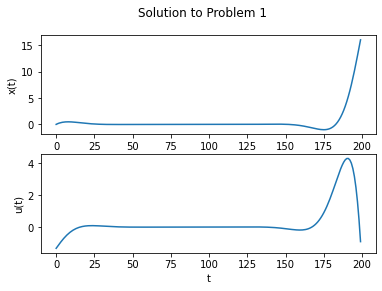

None


In [54]:
def prob1():
    '''
    Find the optimal path for the fixed time horizon problem
    '''    
    def ode(t, y):
        """
        ODE function.
        """
        y1 = y[0]
        y2 = y[1]
        y3 = y[2]
        y4 = y[3]
        return np.array([y2, 5*y4/(4*np.pi), 2*y1, -y3])
    
    def bc(ya, yb):
        """
        Boundary Condition Function.
        """
        return np.array([ya[0], ya[1] - 1, yb[0] - 16, yb[1] - 10])
    
    y0 = np.ones((4, 200)) # Initial guess 
    result = solve_bvp(ode, bc, np.linspace(0, 30, 200), y0).sol(np.linspace(0, 30, 200)) # Solve 
    
    fig, ax = plt.subplots(2, 1) # Generate plots 
    ax[0].plot(result[0])
    ax[0].set_ylabel("x(t)")
    ax[1].plot(result[3]*5/(4*np.pi))
    ax[1].set_ylabel("u(t)")
    ax[1].set_xlabel("t")
    plt.suptitle("Solution to Problem 1")
    plt.show()

print(prob1())

## Problem 2 
Using the ODEs found in 14.7 and 14.11, the obstacle function 14.8, and the following boundary conditions and parameters solve for and plot the optimal path.
\begin{align*}
    t_0 = 0 &, \quad t_f = 20\\
    (c_x,c_y) &= (4,1)\\
    (r_x,r_y) &= (5,.5)\\
    \lambda &= 20\\
    s_0 = \begin{bmatrix}6\\1.5\\0\\0 \end{bmatrix}&, \quad s_f = \begin{bmatrix}0\\0\\0\\0 \end{bmatrix}
\end{align*}
You will need to choose a $W_1$ and $W_2$ which allow the solver to find a valid path.
If these parameters are not chosen correctly, the solver may find a path which goes through the obstacle, not around it.
Plot the obstacle using plt.contour() to be certain path doesn't pass through the obstacle.

In [2]:
def obstacle(x,y,W1=1,r=(1,1),c=(0,0)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse

def obstacle_dx(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

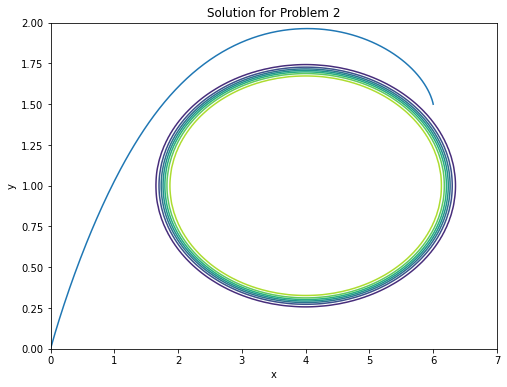

None


In [79]:
def prob2():
    '''
    Find the optimal path for the fixed time horizon problem
    '''
    def ode(t, y):
        """
        ODE Function.
        """
        y1 = y[0] # x
        y2 = y[1] # y
        y3 = y[2] # x'
        y4 = y[3] # y'
        y5 = y[4] # p1
        y6 = y[5] # p2
        y7 = y[6] # p3
        y8 = y[7] # p4
        W1, W2 = 25, 9
        p1p = obstacle_dx(y1, y2, W1, (5, .5,), (4, 1))
        p2p = obstacle_dy(y1, y2, W1, (5, .5,), (4, 1))
        
        return np.array([y3, y4, 1/(2*W2)*y7, 1/(2*W2)*y8, p1p, p2p, -y5, -y6])
    
    def bc(ya, yb):
        """
        Boundary Value Function
        """
        return np.array([ya[0] - 6, ya[1] - 1.5, ya[2], ya[3], yb[0], yb[1], yb[2], yb[3]])
    
    y0 = np.ones((8, 200)) # Initial guess 
    result = solve_bvp(ode, bc, np.linspace(0, 20, 200), y0).sol(np.linspace(0, 20, 200)) # Solve 
    
    X, Y = np.meshgrid(np.linspace(0, 7, 200), np.linspace(0, 2, 200)) # Generate plots 
    obs = obstacle(X, Y, 2, (5, .5,), (4, 1))
    plt.figure(figsize = (8, 6))
    plt.contour(X, Y, obs)
    plt.plot(result[0], result[1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Solution for Problem 2")
    plt.show()
    
print(prob2())

## Problem 3
Solve the following boundary value problem:
\begin{align*}
    y'' + 3y &= \sin(t)\\
    y(0) = 0,\quad y(t_f) = &\frac{\pi}{2}, \quad y'(t_f) = \frac{1}{2}\left(\sqrt{3}\pi \cot(\pi\sqrt{75}) - 1 \right).
\end{align*}
Plot your solution. What $t_f$ did the solver find?

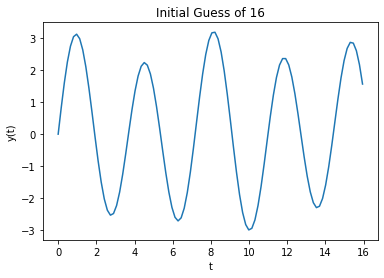

15.940970642290264 is the final time


In [81]:
def prob3():
    '''
    Solve the free time horizon BVP.
    Plot the solution and return the correct end time
    '''
    def ode(t, y, p):
        ''' define the ode system '''
        return p[0]*np.array([y[1], np.sin(p[0]*t) - 3*y[0]])
    
    def bc(ya, yb, p):
        ''' define the boundary conditions '''
        return np.array([ya[0], yb[0] - np.pi/2, yb[1] - .5*(np.sqrt(3)*np.pi*(1/np.tan(np.pi*np.sqrt(75)) - 1))])
    
    t_steps = 100
    t = np.linspace(0,1,t_steps)
    
    y0 = np.ones((2, t_steps)) # Initial guesses 
    p0 = np.array([16])
    
    sol = solve_bvp(ode, bc, t, y0, p0) # Solve 
    
    plt.plot(sol.p[0]*t,sol.sol(t)[0]) # Generate plots 
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title("Initial Guess of 16")
    plt.show()
    
    return str(sol.p[0]) + " is the final time"

print(prob3())

## Problem 4
Refactor your code from problem 2 to create a free end time BVP and use a new boundary value derived from 14.14.
Plot the solution you found.
What is the optimal time?

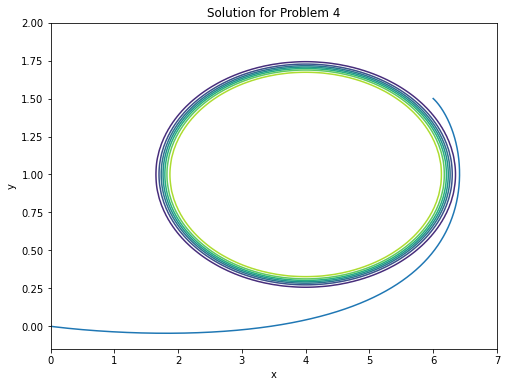

0.22334807395825731 is the final time


In [21]:
def prob4():
    '''
    Find the optimal path and time for the free time horizon problem.
    Plot the solution and return the optimal time.
    '''
    W1, W2 = 4, .1
    def ode(t, y, p):
        """
        ODE Function.
        """
        y1 = y[0] # x
        y2 = y[1] # y
        y3 = y[2] # x'
        y4 = y[3] # y'
        y5 = y[4] # p1
        y6 = y[5] # p2
        y7 = y[6] # p3
        y8 = y[7] # p4
        p1p = obstacle_dx(y1, y2, W1, (5, .5,), (4, 1))
        p2p = obstacle_dy(y1, y2, W1, (5, .5,), (4, 1))
        
        return p[0]*np.array([y3, y4, 1/(2*W2)*y7, 1/(2*W2)*y8, p1p, p2p, -y5, -y6])
    
    def bc(ya, yb, p):
        """
        Boundary Value Function
        """
        s1, s2, s3, s4, p1, p2, p3, p4 = yb
        obs = obstacle(s1, s2, W1, (5, .5,), (4, 1))
        u1, u2 = (1/(2*W2))*p3, (1/(2*W2))*p4 
        H = p1*s3 + p2*s4 + p3*u1 + p4*u2 - (1 + obs + W2*(u1**2 + u2**2))
        return np.array([ya[0] - 6, ya[1] - 1.5, ya[2], ya[3], yb[0], yb[1], yb[2], yb[3], H])
    
    y0 = 3*np.ones((8, 200)) # Initial guess 
    p0 = np.array([6])
    t = np.linspace(0, 20, 200)
    result = solve_bvp(ode, bc, t, y0, p0, max_nodes = 60000) # Solve 
    tf = result.p[0]
    #result = result.sol(np.linspace(0, 1, 200))
    
    X, Y = np.meshgrid(np.linspace(0, 7, 200), np.linspace(0, 2, 200)) # Generate plots 
    obs = obstacle(X, Y, 2, (5, .5,), (4, 1))
    plt.figure(figsize = (8, 6))
    plt.contour(X, Y, obs)
    plt.plot(result.y[0], result.y[1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Solution for Problem 4")
    plt.show()
    
    return str(tf) + " is the final time"
    
print(prob4())

1 2 3
